# Detectron2 Custom Training Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2!

# Install detectron2

In [1]:
!pip install pyyaml==5.1
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 26.7 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=78f055e93049343f53e8d5fe75536d9b4c02be6373304d3626e26f4fa800fc1c
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.0 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org

In [2]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
     |████████████████████████████████| 6.3 MB 689 kB/s 
     |████████████████████████████████| 130 kB 13.7 MB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 
     |████████████████████████████████| 79 kB 9.3 MB/s 
     |████████████████████████████████| 151 kB 67.3 MB/s 
     |████████████████████████████████| 843 kB 55.7 MB/s 
     |████████████████████████████████| 117 kB 68.6 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=dde89438694fe998d81a7ff2518640549776517b0af6f25f20acb43724993f8c
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=ecadf487335d69181c9

In [1]:
import torch
assert torch.__version__.startswith("1.8") 
import torchvision
import cv2

In [4]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow
 
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [3]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/images/
  inflating: data/images/1.jpg       
  inflating: data/images/14-german-shepherd-CruftsChannel4.jpg  
  inflating: data/images/30_07_2018-helmateddn_18257838_9831516.jpg  
  inflating: data/images/300px-I-80_Eastshore_Fwy.jpg  
  inflating: data/images/1280px-German_Shepherd_Dog_with_disc.jpg  
  inflating: data/images/3451e49fa7e5f3584138c4cbb983112e.jpg  
  inflating: data/images/3600.jpg    
  inflating: data/images/3600 (1).jpg  
  inflating: data/images/106036.jpg  
  inflating: data/images/177961-may23-helmet.jpg  
  inflating: data/images/1171297-slow-motion-timelapse-city-cars-traffic-wide-road-vehicles-day-stock-video-footage-videoblocks-wide-road-png-1920_1080_preview.png  
  inflating: data/images/01272020-Kawasaki-Ninja-650-4411-633x388.jpg  
  inflating: data/images/animals_hero_koala02 copy.jpg  
  inflating: data/images/assortment-of-colorful-ripe-tropical-fruits-top-royalty-free-image-995518546-1564092355.

In [5]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("customtrain", {}, "./data/trainval.json", "./data/images")

In [6]:
sample_metadata = MetadataCatalog.get("customtrain")
dataset_dicts = DatasetCatalog.get("customtrain")

WARNING [11/02 11:27:15 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/02 11:27:15 d2.data.datasets.coco]: Loaded 51 images in COCO format from ./data/trainval.json


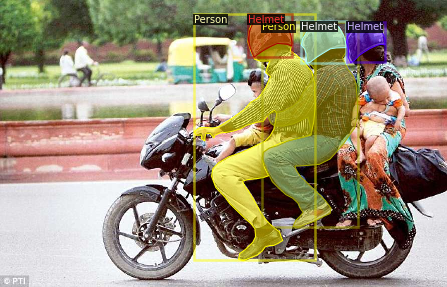

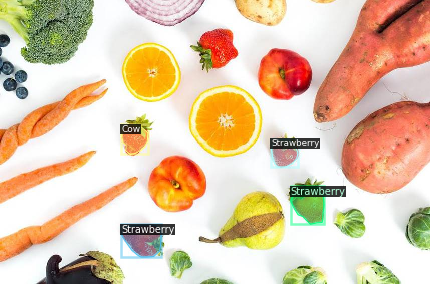

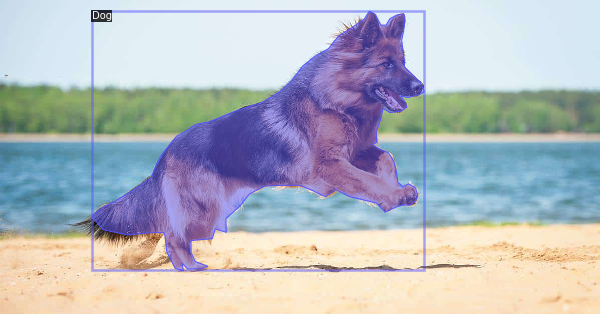

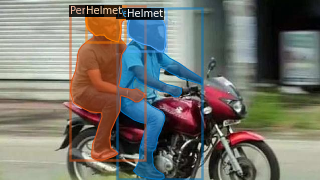

In [7]:
import random

for d in random.sample(dataset_dicts, 4):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=sample_metadata, scale=0.5)
    vis = visualizer. draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [9]:
  from detectron2.engine import DefaultTrainer

  cfg = get_cfg()
  cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
  cfg.DATASETS.TRAIN = ("customtrain",)
  cfg.DATASETS.TEST = ()
  cfg.DATALOADER.NUM_WORKERS = 2
  cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
  cfg.SOLVER.IMS_PER_BATCH = 2
  cfg.SOLVER.BASE_LR = 0.0025  # pick a good LR
  cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
  cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
  cfg.MODEL.ROI_HEADS.NUM_CLASSES = 14  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
  # NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

  os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
  trainer = DefaultTrainer(cfg) 
  trainer.resume_or_load(resume=True)
  trainer.train()

[11/02 11:41:16 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[11/02 11:41:16 d2.engine.train_loop]: Starting training from iteration 0
[11/02 11:41:26 d2.utils.events]:  eta: 0:02:20  iter: 19  total_loss: 3.771  loss_cls: 2.431  loss_box_reg: 0.6117  loss_mask: 0.6891  loss_rpn_cls: 0.03368  loss_rpn_loc: 0.01194  time: 0.4984  data_time: 0.0394  lr: 0.00016068  max_mem: 3184M
[11/02 11:41:36 d2.utils.events]:  eta: 0:02:09  iter: 39  total_loss: 2.142  loss_cls: 0.8711  loss_box_reg: 0.5089  loss_mask: 0.6262  loss_rpn_cls: 0.0233  loss_rpn_loc: 0.01011  time: 0.4956  data_time: 0.0134  lr: 0.00032718  max_mem: 3273M
[11/02 11:41:46 d2.utils.events]:  eta: 0:01:59  iter: 59  total_loss: 1.859  loss_cls: 0.6713  loss_box_reg: 0.65  loss_mask: 0.5439  loss_rpn_cls: 0.01813  loss_rpn_loc: 0.009385  time: 0.4913  data_time: 0.0101  lr: 0.00049367  max_mem: 3273M
[11/02 11:41:56 d2.utils.events]:  eta: 0:01:50  iter: 79  total_loss: 1.701  loss_cls: 0.6432  loss_box_reg: 0.6319  loss_mask: 0.4208  loss_rpn_cls: 0.008438  loss_rpn_loc: 0.009904  tim

In [10]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("customtrain", )
predictor = DefaultPredictor(cfg)

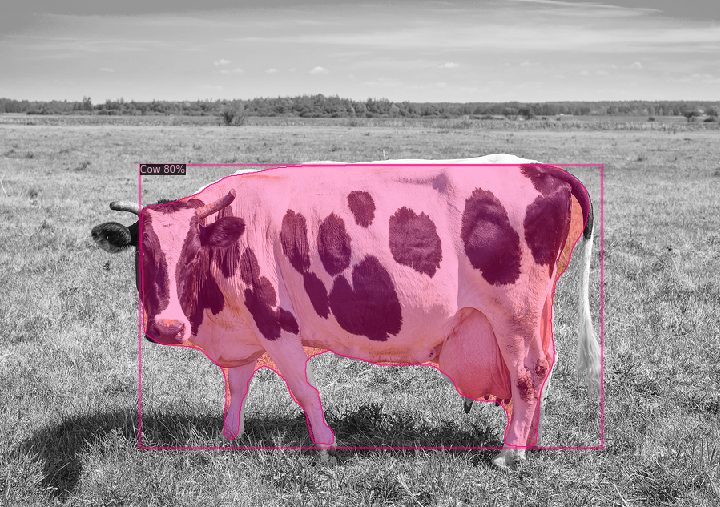

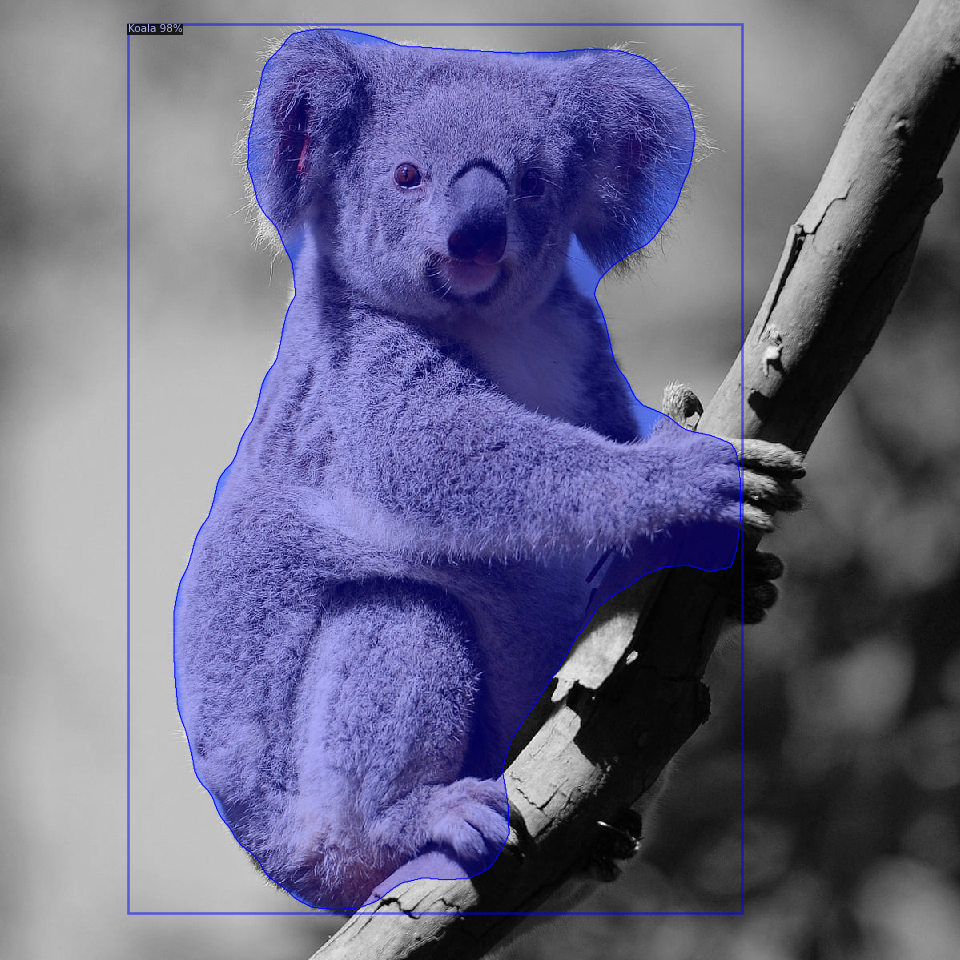

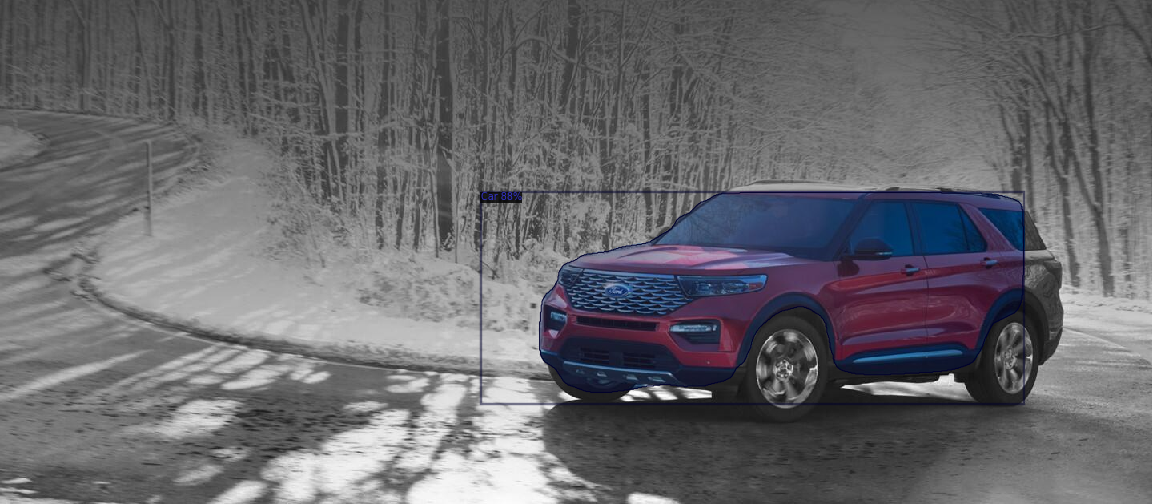

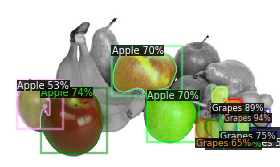

In [13]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 4):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=sample_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

### Evaluation
We can evaluate its performance using AP metric implemented in COCO API.


In [14]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("customtrain", ("bbox", "segm"), False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "customtrain")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

WARNING [11/02 11:58:09 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/02 11:58:09 d2.data.datasets.coco]: Loaded 51 images in COCO format from ./data/trainval.json
[11/02 11:58:09 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/02 11:58:09 d2.data.common]: Serializing 51 elements to byte tensors and concatenating them all ...
[11/02 11:58:09 d2.data.common]: Serialized dataset takes 0.13 MiB
[11/02 11:58:09 d2.evaluation.evaluator]: Start inference on 51 batches
[11/02 11:58:11 d2.evaluation.evaluator]: Inference done 11/51. Dataloading: 0.0020 s/iter. Inference: 0.1180 s/iter. Eval: 0.0134 s/iter. Total: 0.1334 s/iter. ETA=0:00:05
[11/02 11:58:16 d2.evaluation.evaluator]: Inference done 40/51. Dataloading: 0.0065 s/iter. Inference: 0.1168 s/iter. Eval: 0.0431 s/iter. Total: 0.1665 s/iter. ETA=0:00

### Getting the custom config file

In [ ]:
f = open('config.yml', 'w')
f.write(cfg.dump())
f.close()